In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data

,F,1,2,3,4,5,6,7,8,9
0,10.752880,137.0,278.3,413.8,560.7,694.1,844.0,975.9,1127.0,1263.8
1,15.481988,164.3,330.0,495.5,661.0,827.6,994.4,1161.3,1329.0,1497.0
2,20.266063,188.0,377.3,565.9,755.4,945.0,1135.2,1325.9,1518.0,1709.0
3,24.981429,210.0,420.9,631.3,842.0,1053.6,1265.2,1477.0,1690.3,1903.7
4,29.716426,228.0,457.0,685.0,914.0,1141.0,1370.0,1599.0,1828.0,2061.0


In [5]:
print(data.style.to_latex())

\begin{tabular}{lrrrrrrrrrr}
 & F & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\
0 & 10.752880 & 137.000000 & 278.300000 & 413.800000 & 560.700000 & 694.100000 & 844.000000 & 975.900000 & 1127.000000 & 1263.800000 \\
1 & 15.481988 & 164.300000 & 330.000000 & 495.500000 & 661.000000 & 827.600000 & 994.400000 & 1161.300000 & 1329.000000 & 1497.000000 \\
2 & 20.266063 & 188.000000 & 377.300000 & 565.900000 & 755.400000 & 945.000000 & 1135.200000 & 1325.900000 & 1518.000000 & 1709.000000 \\
3 & 24.981429 & 210.000000 & 420.900000 & 631.300000 & 842.000000 & 1053.600000 & 1265.200000 & 1477.000000 & 1690.300000 & 1903.700000 \\
4 & 29.716426 & 228.000000 & 457.000000 & 685.000000 & 914.000000 & 1141.000000 & 1370.000000 & 1599.000000 & 1828.000000 & 2061.000000 \\
\end{tabular}



In [6]:
data['F']

0    10.752880
1    15.481988
2    20.266063
3    24.981429
4    29.716426
Name: F, dtype: float64

In [7]:
harmonics = data.to_numpy()[:,1:]

[10.75288025 15.48198815 20.26606285 24.98142905 29.71642625]
[141.01333333 166.54666667 190.09833333 211.62666667 228.81666667]
1728.8450427934724 1189.1642433746874


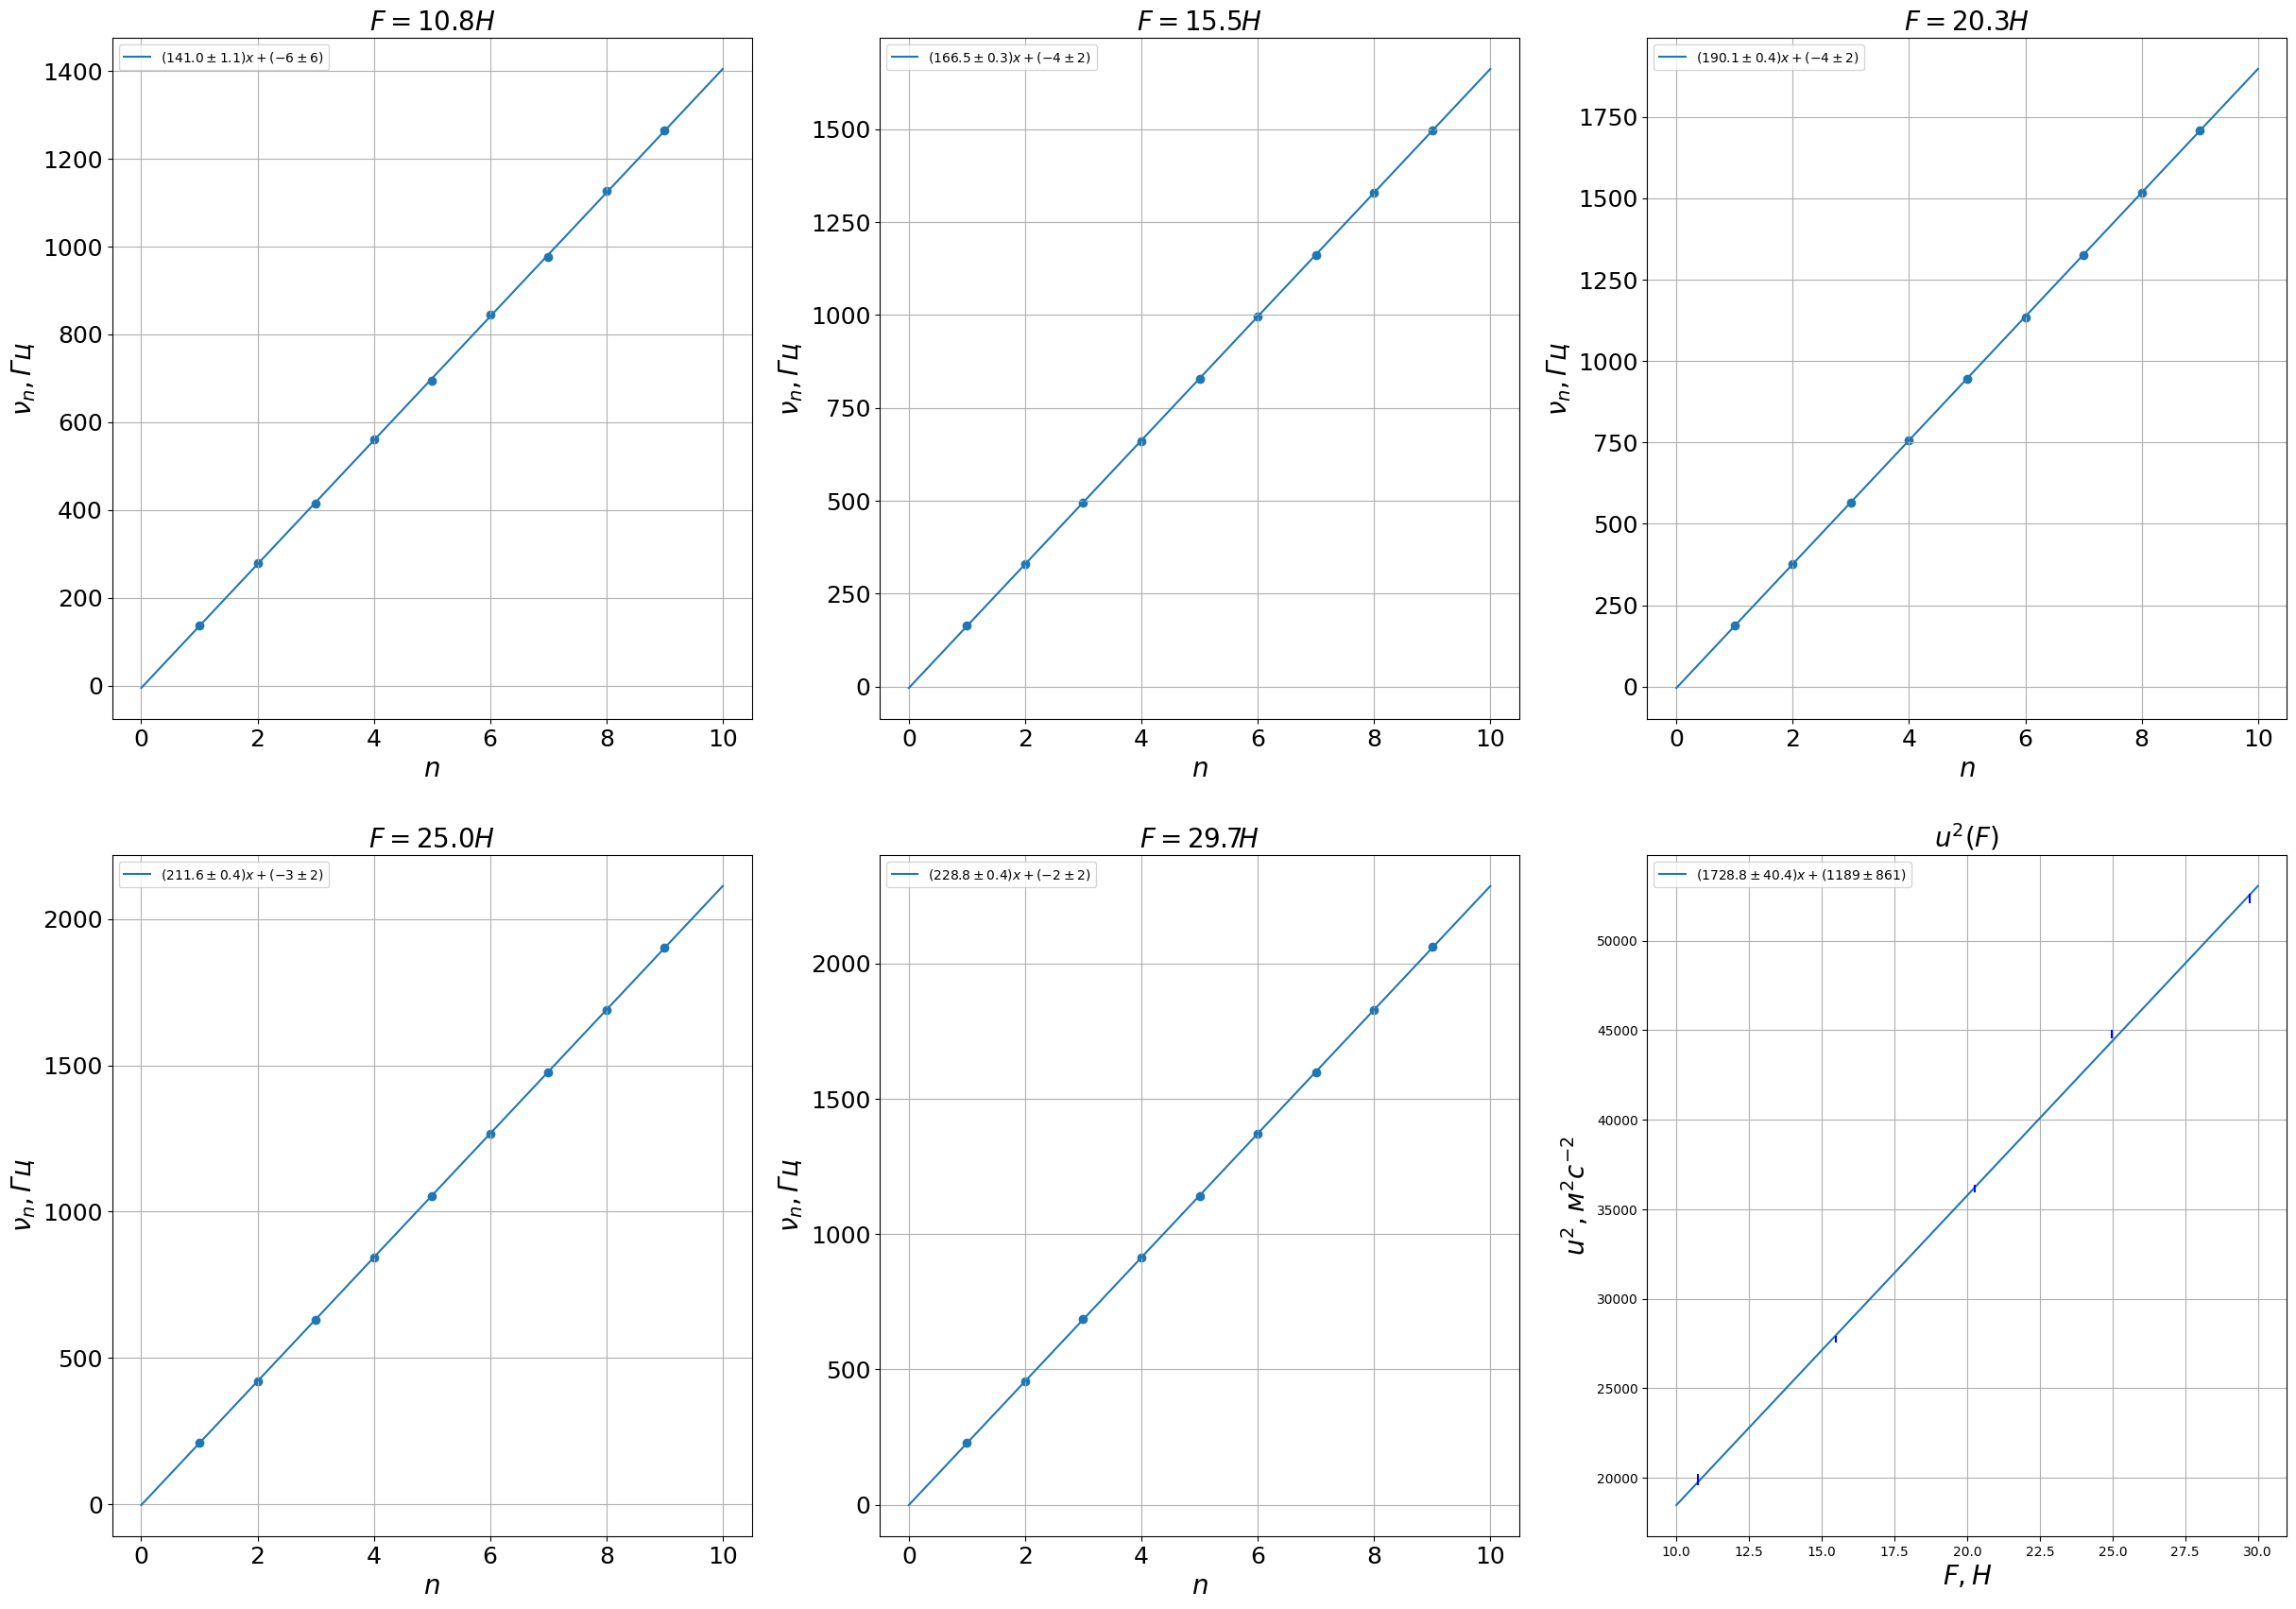

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(29.7, 21), dpi=100)

l = 0.5
l_err = 0.001

F = data['F'].to_numpy()
v1 = np.empty(5, dtype=float)
v1_err = np.empty(5, dtype=float)


for i in range(5):
    y = i % 3
    x = i // 3
    
    ax[x, y].grid(True)    
    ax[x, y].set_title(f'$F={F[i]:.1f}H$', fontsize=20)
    
    X = np.arange(1, 10)
    Y = harmonics[i]
    
    ax[x, y].scatter(np.arange(1,10), harmonics[i])
    a, b = np.polyfit(X, Y, deg=1)
    
    S_x = np.std(X) ** 2
    S_y = np.std(Y) ** 2
    a_err = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
    b_err = a_err * np.sqrt(np.mean(X**2))
    ax[x, y].plot([0, 10], [b, b + 10*a], label=f'$({a:.1f}\pm{a_err:.1f})x +({b:1.0f}\pm{b_err:1.0f})$')
    ax[x, y].legend()
    ax[x, y].set_xlabel(r"$n$", fontsize=20)
    ax[x, y].set_ylabel(r"$\nu_n, Гц$", fontsize=20)
    
    ax[x, y].tick_params(axis='x', labelsize=18)
    ax[x, y].tick_params(axis='y', labelsize=18)
    
    v1[i] = a
    v1_err[i] = a_err

print(F)
print(v1)

u = 2*l*v1
u_err = u * np.sqrt((l_err/l)**2 + (v1_err/v1)**2)

X = F
Y = u**2

Y_err = 2*u*u_err

ax[1, 2].grid(True)    
ax[1, 2].set_title(f'$u^2(F)$', fontsize=20)
a, b = np.polyfit(X, Y, deg=1)

S_x = np.std(X) ** 2
S_y = np.std(Y) ** 2
a_err = 2 * np.sqrt((S_y/S_x - a ** 2)/(len(X) - 2))
b_err = a_err * np.sqrt(np.mean(X**2))
ax[1, 2].plot([10, 30], [10*a + b, 30*a + b], label=f'$({a:.1f}\pm{a_err:.1f})x +({b:1.0f}\pm{b_err:1.0f})$')
ax[1, 2].errorbar(X, Y, yerr=Y_err, linestyle='', color='b') 

ax[1, 2].legend()

ax[1, 2].set_xlabel(r"$F, Н$", fontsize=20)
ax[1, 2].set_ylabel(r"$u^2, м^2с^{-2}$", fontsize=20)
print(a, b)

plt.savefig('../pictures/plots.png')